In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv(r'C:\Users\raidi\OneDrive\Desktop\Python\Datasets\heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
print("Heart disease value counts:\n",df.HeartDisease.value_counts())

Heart disease value counts:
 1    508
0    410
Name: HeartDisease, dtype: int64


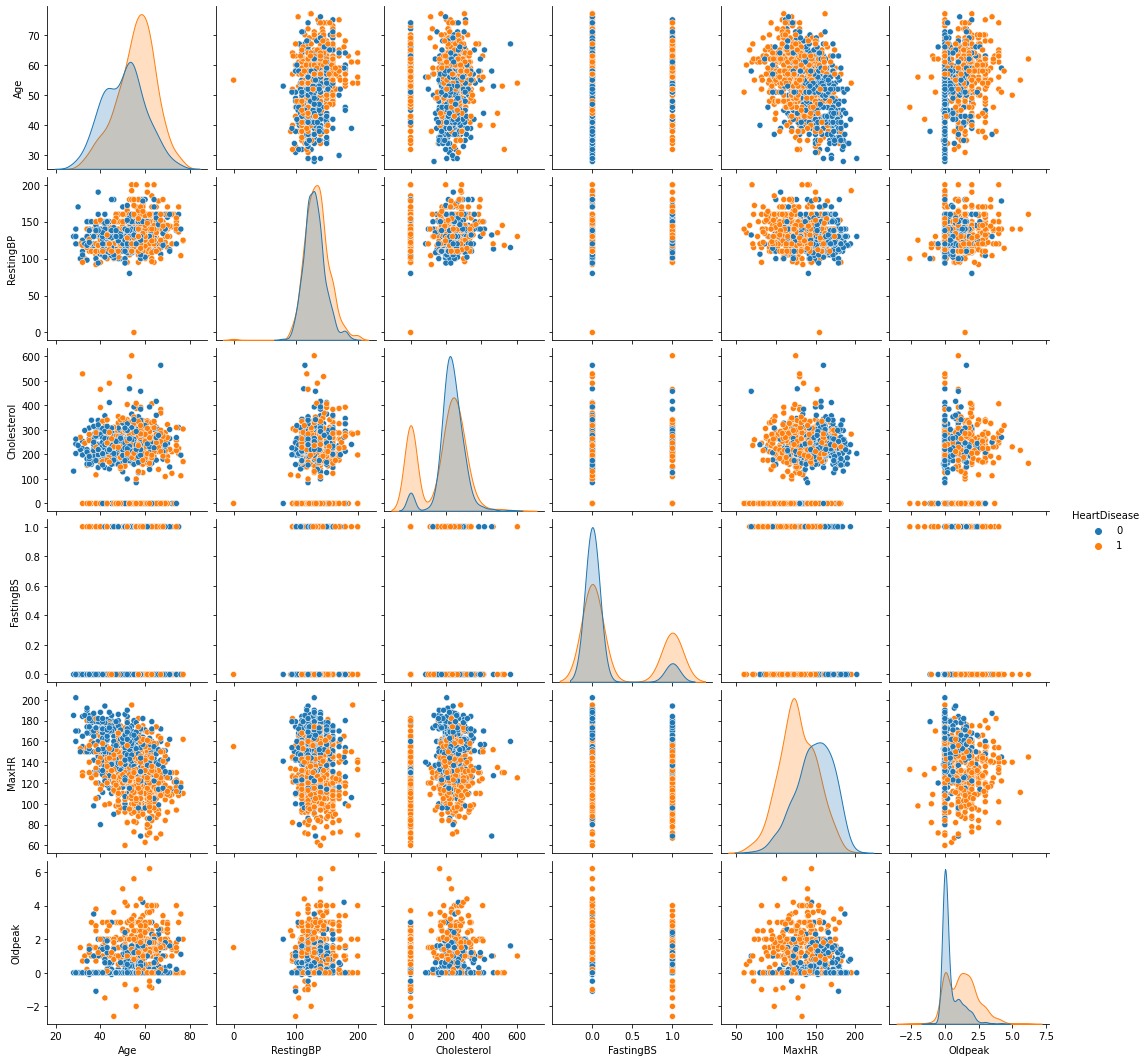

In [8]:
sns.pairplot(df,hue='HeartDisease')

[Text(0, 0, '725 (79%)'), Text(0, 0, '193 (21%)')]

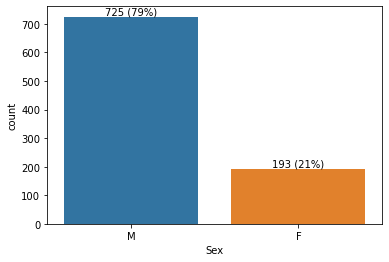

In [9]:
ax = sns.countplot(x=df["Sex"],order=df["Sex"].value_counts(ascending=False).index);
abs_values = df["Sex"].value_counts(ascending=False)
rel_values = df["Sex"].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

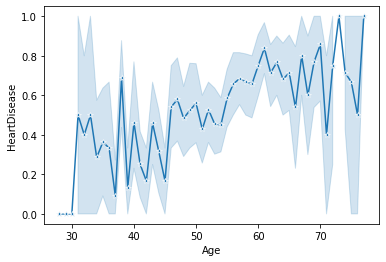

In [10]:
sns.lineplot(data=df, x="Age", y="HeartDisease",marker="*")

In [11]:
#From lineplot it seems heart failure increases as age of patient increases

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

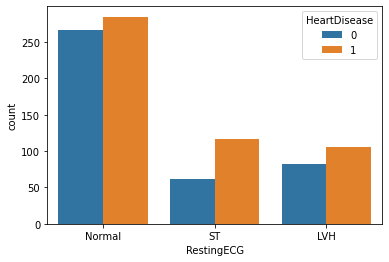

In [12]:
sns.countplot(df['RestingECG'],data=df,hue=df['HeartDisease'])

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

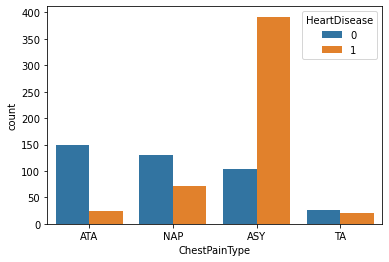

In [13]:
sns.countplot(df['ChestPainType'],data=df,hue=df['HeartDisease'])

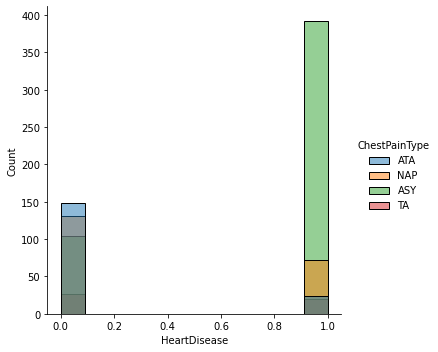

In [14]:
sns.displot(data=df,x='HeartDisease',hue='ChestPainType')

In [15]:
#from observation more patient are of Asymptomatic(ASY) chest pain type.

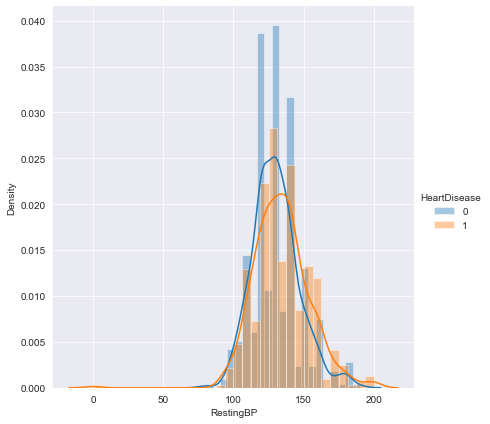

In [16]:
sns.set_style('darkgrid')
a=sns.FacetGrid(df,hue='HeartDisease',size=6).map(sns.distplot,'RestingBP').add_legend()

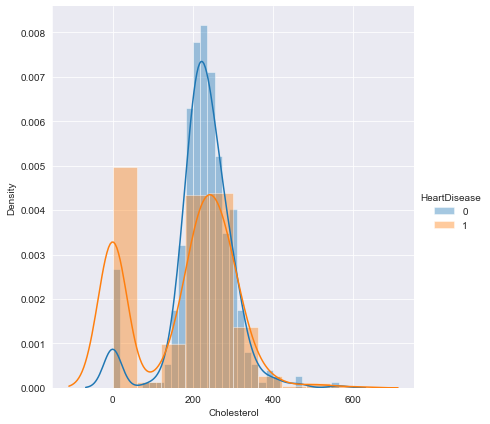

In [17]:
sns.set_style('darkgrid')
a=sns.FacetGrid(df,hue='HeartDisease',size=6).map(sns.distplot,'Cholesterol').add_legend()

<AxesSubplot:>

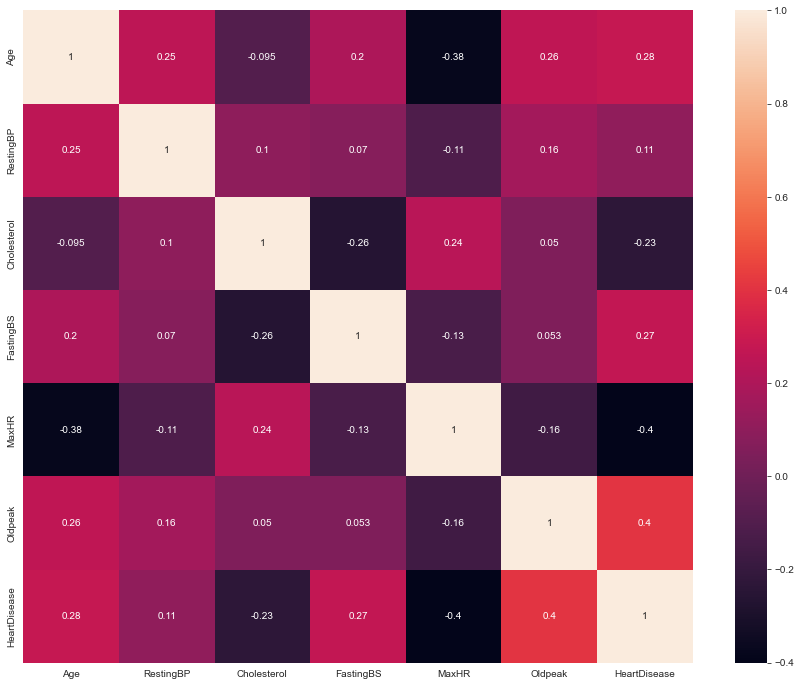

In [18]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

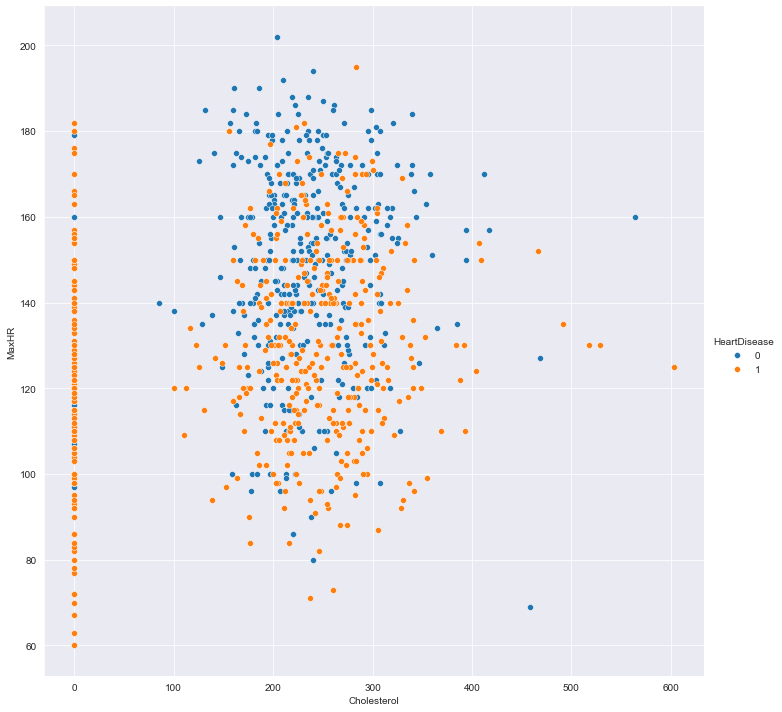

In [19]:
sns.FacetGrid(df, hue='HeartDisease',size=10).map(sns.scatterplot, "Cholesterol", "MaxHR").add_legend()

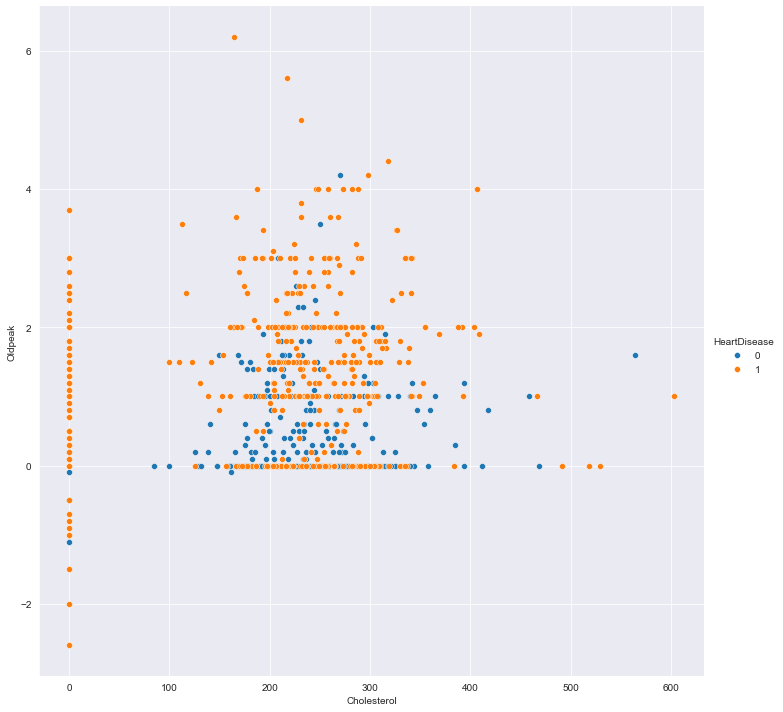

In [20]:
sns.FacetGrid(df, hue='HeartDisease',size=10).map(sns.scatterplot,"Cholesterol","Oldpeak").add_legend()

<AxesSubplot:>

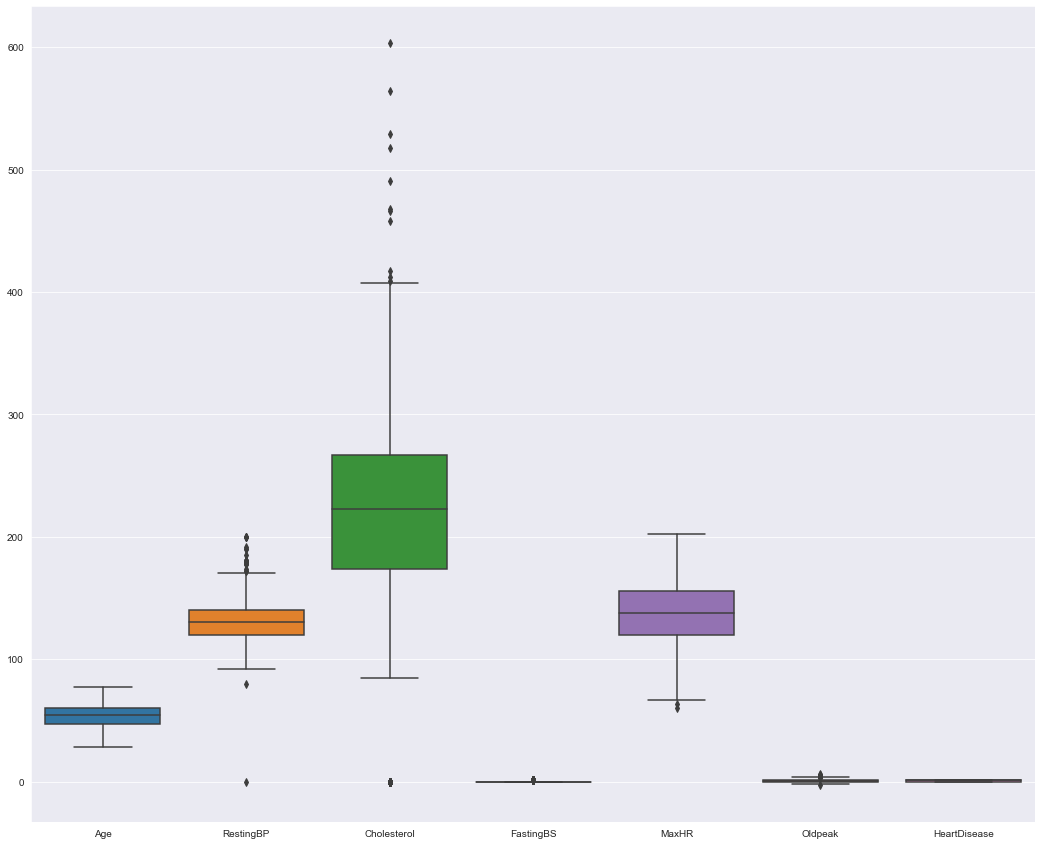

In [21]:
plt.figure(figsize=(18,15))
sns.boxplot(data=df)

In [22]:
#Outliers need to remove while in featuring engineering